In [1]:
import os 
import matplotlib.pyplot as plt
import tensorflow as tf
import shutil
import string
import re

from tensorflow.keras import losses
from tensorflow.keras import layers

In [12]:
url='https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'

dataset=tf.keras.utils.get_file('stack_overflow_16k', url, untar=True, cache_dir='.', cache_subdir='./stack')


6053168/6053168 [==============================] - 9s 1us/step


In [14]:
datset_dir=os.path.dirname(dataset)

In [15]:
os.listdir(dataset_dir)

['README.md', 'stack_overflow_16k.tar.gz', 'test', 'train']

In [16]:
train_dir=os.path.join(dataset_dir, 'train')

In [17]:
os.listdir(train_dir)

['csharp', 'java', 'javascript', 'python']

In [18]:
sampletext=os.path.join(train_dir,'python/1.txt')
with open(sampletext) as f:
    print(f.read())

"how to create an infinite loop with apply_async? i havea pool of processes with apply_async in which the different processes take different times to provide output. once one process is finished i do some calculations with their output. after i want to launch another process. in this way i want to create an infinite loop which launches processes, reads the output of the recently finished process, does some calculations and relaunches another process...so far i have been able to do what i want except that the main process gets stuck in the get() function. this because i don't know which process terminated and hence which entry of results i should do get()...some attempt code:..import multiprocessing as mp.import numpy as np.from time import sleep...def squared(x,y):.    result = np.array((x,x)).    if x%2 == 0:.    sleep(2) .return result.....if __name__ == ""__main__"":..    pool = mp.pool() ..    pool_r = [].    for i in xrange(0,8):.        pool_r.append(pool.apply_async(squared, (i,

In [20]:
batch_size=32
seed=42
raw_train_ds=tf.keras.utils.text_dataset_from_directory(
    'stack/train',
    batch_size=batch_size,
    seed=seed,
    validation_split=0.2,
    subset='training'
)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


In [21]:
raw_val_ds=tf.keras.utils.text_dataset_from_directory(
    'stack/train',
    batch_size=batch_size,
    seed=seed,
    validation_split=0.2,
    subset='validation'
)

Found 8000 files belonging to 4 classes.
Using 1600 files for validation.


In [22]:
raw_test_ds=tf.keras.utils.text_dataset_from_directory(
    'stack/test',
    batch_size=batch_size
)

Found 8000 files belonging to 4 classes.


In [24]:
for t,l in raw_train_ds.take(1):
    for i in range(2):
        print(t.numpy()[i])
        print(l.numpy()[i])

b'"blank8 why is my solution faster than the neat solution? (hackerrank chocolate feast) edit: simplified my solution..edit: removed opinion based secondary question...background: atarted learning blank a week or two ago using hackerranks problems as exercises and stackoverflow search + google as my teacher, i\'ve had some limited experience learning other languages...i did the exercise my own ""noobish learner way"" which i can\'t help but feel is a ""botched job"" when i see ""neat &amp; short"" solutions...however, when submitting both solutions one after another a couple of times i found the ""neat"" solution was quite a bit slower. ..i vaguely remember something about % operations being costly, is mine faster because of no % operations or is there more to it than just that?..exercise: https://www.hackerrank.com/challenges/chocolate-feast..neat solution from discussion:..import blank.io.*;.import blank.util.*;..public class solution {.    static int cc; .    public static void main

In [32]:
def custom_standardizer(input_data):
    lowercase=tf.strings.lower(input_data)
    stripped_text=tf.strings.regex_replace(lowercase, r'[\W]', ' ')
    remove_number=tf.strings.regex_replace(stripped_text, r'[\d]', ' ')
    stripped_text=tf.strings.regex_replace(remove_number, r' +', ' ')
    return tf.strings.regex_replace(stripped_text,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')
     

In [33]:
custom_standardizer("""blank8 why is my solution faster than the neat solution? (hackerrank chocolate feast) edit: simplified my solution..edit: removed opinion based secondary question...background: atarted learning blank a week or two ago using hackerranks problems as exercises and stackoverflow search + google as my teacher, i\'ve had some limited experience learning other languages...i did the exercise my own ""noobish learner way"" which i can\'t help but feel is a ""botched job"" when i see ""neat &amp; short"" solutions...however, when submitting both solutions one after another a couple of times i found the ""neat"" solution was quite a bit slower. ..i vaguely remember something about % operations being costly, is mine faster because of no % operations or is there more to it than just that?..exercise: https://www.hackerrank.com/challenges/chocolate-feast..neat solution from discussion:..import blank.io.*;.import blank.util.*;..public class solution {.    static int cc; .    public static void main(string[] args) {.        scanner in = new scanner(system.in);.        int t,n,c,m,r;.            t = in.nextint();.            while(t--&gt;0){.             n = in.nextint();.            c = in.nextint();.             m = in.nextint();.                r=n/c;.                cc=r;..                    while(r&gt;=m){.                        cc=cc+r/m;.                        r=r%m+r/m;.                    }..                system.out.println(cc); .            }..    }.}...my solution:..import blank.io.*;.import blank.util.*;..public class solution {..    public static void main(string[] args) {..        scanner sc = new scanner(system.in);.        int t = integer.parseint(sc.nextline());    //t = number of test cases.        int[][] tc = readinput(sc, t);              //tc[t][0] = money. tc[t][1] = price. tc[t][2] = wrappers per free bar..        for (int i = 0; i&lt;t; i++){                  //loop for all test cases.            int choc = calcchoc(tc,i);              //work out how much choc can be bought.            system.out.println(choc);               //print result for the test case.        }.    }.    //calculate how much choc he can buy with m $ at p price with w wrappers needed for a free bar.    public static int calcchoc(int[][] tc,int i){..        int m = tc[i][0];       //money he has.        int p = tc[i][1];       //price of choc.        int w = tc[i][2];       //wrappers per free bar..        int bars = m/p;         //how many bars he can buy initially.        int wrappers = bars;    //each bar is a wrapper from initial purpose..        //loop to turn in all wrappers while it is possible to do so.        while (w&lt;=wrappers){..            int barsfromturnin = wrappers/w;                //bars from turning in current wrappers..            bars = bars + barsfromturnin;                   //new bar count.            wrappers = wrappers - (barsfromturnin * (w-1)); //wrapper count reduced by amount of wrappers turned in -1 wrapper per bar recieved from turn in...            if (w==1){ //break out of infinite loop when you get 1 bar for 1 wrapper!.                system.out.print(""infinite bars, exiting infinite loop at bars = "");.                break;.            }.        }.        return bars;.    }.    //read input for each test case and make 2d array of the info.    public static int[][] readinput(scanner sc, int t){..        int[][] input = new int[t][3];..        for (int i = 0; i&lt;t; i++){.            string[] inputline = sc.nextline().split("" "");..            input[i][0] = integer.parseint(inputline[0]);.            input[i][1] = integer.parseint(inputline[1]);.            input[i][2] = integer.parseint(inputline[2]);.        }.        return input;.    }.}""")

<tf.Tensor: shape=(), dtype=string, numpy=b'blank why is my solution faster than the neat solution hackerrank chocolate feast edit simplified my solution edit removed opinion based secondary question background atarted learning blank a week or two ago using hackerranks problems as exercises and stackoverflow search google as my teacher i ve had some limited experience learning other languages i did the exercise my own noobish learner way which i can t help but feel is a botched job when i see neat amp short solutions however when submitting both solutions one after another a couple of times i found the neat solution was quite a bit slower i vaguely remember something about operations being costly is mine faster because of no operations or is there more to it than just that exercise https www hackerrank com challenges chocolate feast neat solution from discussion import blank io import blank util public class solution static int cc public static void main string args scanner in new scan

In [35]:
max_features=10000
sequence_length=250

In [36]:
vectorize_layer=layers.TextVectorization(
    standardize=custom_standardizer,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length
)

In [38]:
train_text=raw_train_ds.map(lambda x,y:x)
vectorize_layer.adapt(train_text)

In [39]:
def vectorize_text(text, label):
    text=tf.expand_dims(text, -1)
    return vectorize_layer(text), label

In [40]:
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'"function expected error in blank for dynamically created check box when it is clicked i want to grab the attribute value.it is working in ie 8,9,10 but not working in ie 11,chrome shows function expected error..&lt;input type=checkbox checked=\'checked\' id=\'symptomfailurecodeid\' tabindex=\'54\' style=\'cursor:pointer;\' onclick=chkclickevt(this);  failurecodeid=""1"" &gt;...function chkclickevt(obj) { .    alert(obj.attributes(""failurecodeid""));.}"\n', shape=(), dtype=string)
Label javascript
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  29,  505,   75,    9,   15,   16, 1116,  368,  229,  438,   57,
          14,    7,  793,    2,   67,    4, 2311,    3,  628,   33,   14,
           7,  202,    9,  866,   28,   32,  202,    9,  866,  985,  665,
          29,  505,   75,    8,   56,   80,  847,  490,  490,   76,    1,
        6606,  242, 1090, 2113,  376,    1,   11,    1,    6,   29,    1,
         309,  306,  309,  828,    1,   

In [42]:
print('306-->', vectorize_layer.get_vocabulary()[306])

306--> alert


In [44]:
train_ds=raw_train_ds.map(vectorize_text)
val_ds=raw_val_ds.map(vectorize_text)
test_ds=raw_test_ds.map(vectorize_text)

In [45]:
train_ds=train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [46]:
embedding_dims=16

In [50]:
model=tf.keras.Sequential([
    layers.Embedding(max_features, embedding_dims),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(0.2),
    layers.Dense(4)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          160000    
                                                                 
 dropout_1 (Dropout)         (None, None, 16)          0         
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 4)                 68        
                                                                 
Total params: 160068 (625.27 KB)
Trainable params: 160068 (625.27 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [51]:
model.compile(
    optimizer='adam',
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [52]:
history=model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10

200/200 [==============================] - 11s 36ms/step - loss: 1.3684 - accuracy: 0.4348 - val_loss: 1.3420 - val_accuracy: 0.6400
Epoch 2/10
200/200 [==============================] - 2s 8ms/step - loss: 1.3019 - accuracy: 0.6075 - val_loss: 1.2507 - val_accuracy: 0.6831
Epoch 3/10
200/200 [==============================] - 2s 8ms/step - loss: 1.1949 - accuracy: 0.6741 - val_loss: 1.1314 - val_accuracy: 0.7281
Epoch 4/10
200/200 [==============================] - 2s 8ms/step - loss: 1.0739 - accuracy: 0.7286 - val_loss: 1.0151 - val_accuracy: 0.7619
Epoch 5/10
200/200 [==============================] - 2s 8ms/step - loss: 0.9619 - accuracy: 0.7659 - val_loss: 0.9158 - val_accuracy: 0.7887
Epoch 6/10
200/200 [==============================] - 2s 8ms/step - loss: 0.8657 - accuracy: 0.7977 - val_loss: 0.8336 - val_accuracy: 0.7956
Epoch 7/10
200/200 [==============================] - 2s 9ms/step - loss: 0.7852 - accuracy: 0.8139 - val_loss: 0.7663 - val_accuracy: 0.8050
Epo

In [53]:
model.evaluate(test_ds)

250/250 [==============================] - 36s 137ms/step - loss: 0.6465 - accuracy: 0.8173


[0.6465440392494202, 0.8172500133514404]

In [55]:
acc_dict=history.history
acc_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [56]:
loss=acc_dict['loss']
accuracy=acc_dict['accuracy']
val_loss=acc_dict['val_loss']
val_accuracy=acc_dict['val_accuracy']

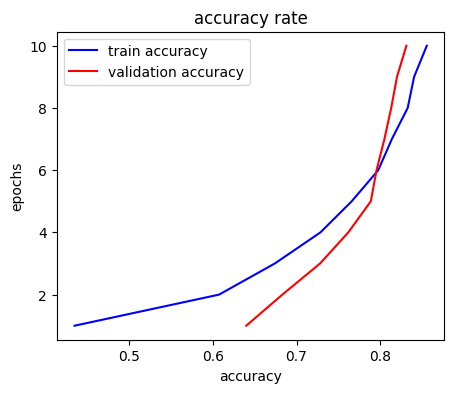

In [66]:
plt.figure(figsize=(5,4))
plt.plot(accuracy, range(1, len(accuracy)+1), 'b', label='train accuracy')
plt.plot(val_accuracy, range(1, len(accuracy)+1), 'r', label='validation accuracy')
plt.xlabel('accuracy')
plt.ylabel('epochs')
plt.title('accuracy rate')
plt.legend()
plt.show()

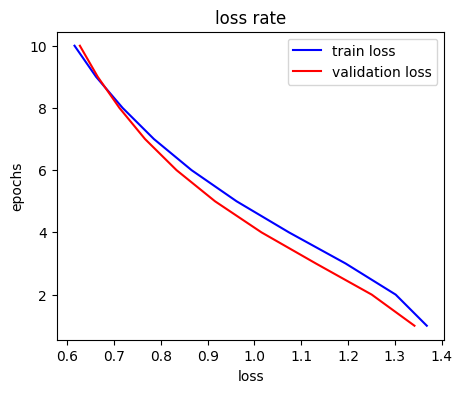

In [65]:
plt.figure(figsize=(5,4))
plt.plot(loss, range(1, len(accuracy)+1), 'b', label='train loss')
plt.plot(val_loss, range(1, len(accuracy)+1), 'r', label='validation loss')
plt.xlabel('loss')
plt.ylabel('epochs')
plt.title('loss rate')
plt.legend()
plt.show()

In [69]:
exported_model=tf.keras.Sequential([
    vectorize_layer,
    model,
    layers.Activation('sigmoid')
])
exported_model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
loss, accuracy = exported_model.evaluate(raw_test_ds)
print(accuracy)


C:\Users\Javohir\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


250/250 [==============================] - 6s 15ms/step - loss: 0.6465 - accuracy: 0.8173
0.8172500133514404


In [71]:
text=['def sequantial for in range']
exported_model.predict(text)

1/1 [==============================] - 1s 623ms/step


array([[0.48295507, 0.43753317, 0.48979682, 0.58073044]], dtype=float32)

In [73]:
raw_val_ds.class_names

['csharp', 'java', 'javascript', 'python']